In [1]:
import os
import shutil
import numpy as np
import gpflow as gpf
import tensorflow as tf
import sklearn.preprocessing as pp

In [2]:
import sys
sys.path.append('../')

import gprmachine as gpm

### Typhoon_longitude

In [3]:
example = 'Typhoon'
target = 0
n_start = 0
n_train = 47
n_test = 30
noise_level = 0
n_task = 5
n_iter = 80
k_low_list = [12.0, 12.0, 12.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 14.0, 8.00,
              5.00, 5.00, 4.00, 4.00, 4.00, 4.00, 4.00, 2.00, 2.00, 2.00, 2.00,
              2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00]
k_up_list = [16.0, 16.0, 16.0, 18.0, 20.0, 20.0, 20.0, 20.0, 20.0, 15.0, 14.0,
             11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 7.00, 7.00, 7.00, 7.00,
             8.00, 8.00, 8.00, 8.00, 8.00, 6.00, 6.00, 5.00]

In [4]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

trainer = gpm.train.MultipleTrainer()
mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [6]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='ticks', font_scale=1.2)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

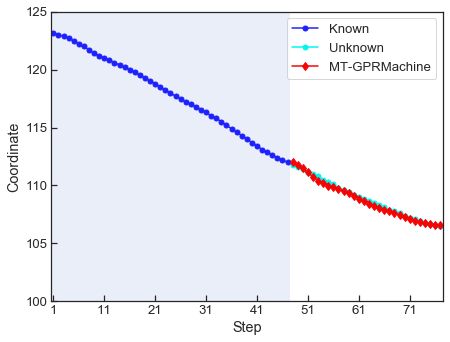

In [12]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(100, 125)
ax.set_xticks(range(0, 77, 10))
ax.set_xticklabels(np.arange(1, 77 + 1, 10))
ax.set_xlim(-.5, 77 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()

### Typhoon_latitude

In [13]:
example = 'Typhoon'
target = 1
n_start = 0
n_train = 47
n_test = 30
noise_level = 0
n_task = 5
n_iter = 80
k_low_list = [20.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0,
              50.0, 16.0, 16.0, 16.0, 16.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,
              10.0, 10.0, 10.0, 8.0, 2.00, 2.00, 1.50, 1.50]
k_up_list = [22.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0,
             54.0, 20.0, 20.0, 20.0, 20.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0,
             11.0, 11.0, 11.0, 10.0, 4.00, 4.00, 3.50, 3.50]

In [14]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

rdata_n = rdata + np.random.uniform(0, noise_level, np.shape(rdata))

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata_n)

trainer = gpm.train.MultipleTrainer()
mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [15]:
scaler = pp.MinMaxScaler()
X = rdata_n
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [17]:
res_file = f'{example}_{target+1}_T{n_task}.txt'
np.savetxt(res_file, pred)

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

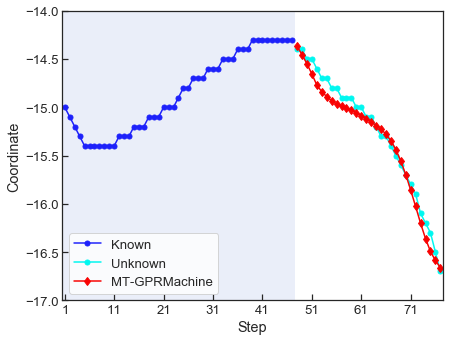

In [19]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(-17, -14)
ax.set_xticks(range(0, 77, 10))
ax.set_xticklabels(np.arange(1, 77 + 1, 10))
ax.set_xlim(-.5, 77 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()